In [1]:
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import backend as keras

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# data preparation for dicty
from prepare_data import *

In [3]:
import sys
sys.path.insert(0, os.getcwd().rsplit('/',1)[0])

import loops_utils

# load unet model
from unet_model import *

In [4]:
%matplotlib inline

In [5]:
image_size = 256

In [6]:
X_train, y_train = prepare_data(image_size, chromosomes=[1,5])
X, y = prepare_data(image_size, chromosomes=[6])
X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [7]:
input_img = Input((image_size, image_size, 1), name='img')
model = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

weights_path = 'weights/model_unet_256_transfer_learning.h5'

callbacks = [
        EarlyStopping(patience=10, verbose=1),
        ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
        ModelCheckpoint(weights_path, verbose=1, save_best_only=True, save_weights_only=True)
    ]

model.load_weights('../rao/weights/model_unet_256.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Test score: 0.21660444140434265
Test accuracy: 0.9519805908203125
4/4 [==============================] - 1s 202ms/step


/Users/alex/Desktop/ws/hse/diploma/loops/loops_utils.py:62: RuntimeWarning: divide by zero encountered in log
  raw = np.log(raw)


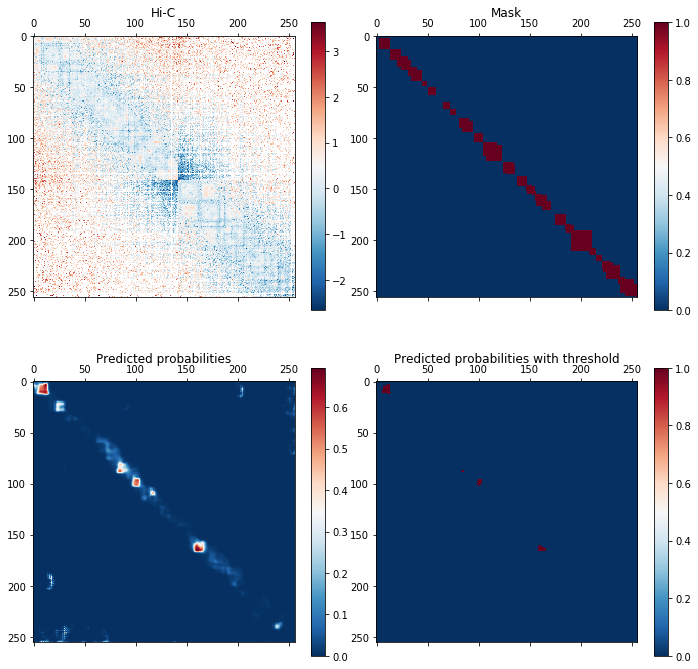

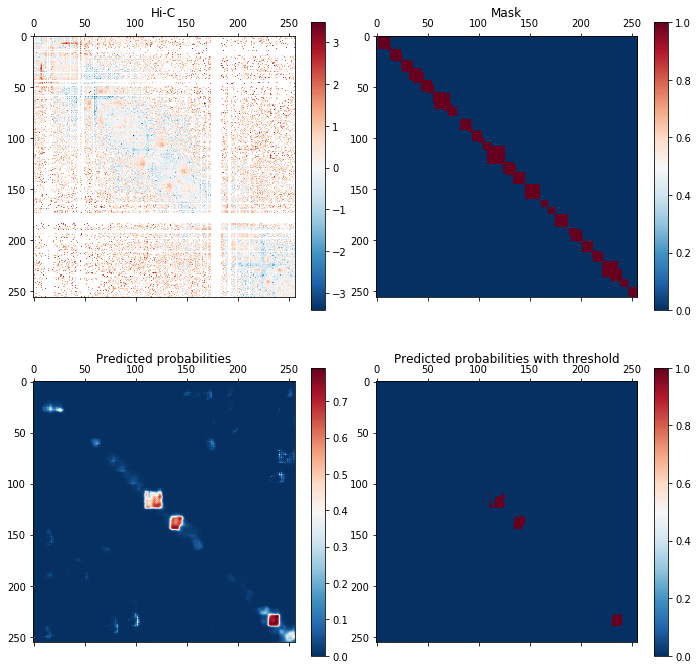

In [8]:
score, acc = model.evaluate(X_test, y_test, verbose=0)
    
print('Test score:', score)
print('Test accuracy:', acc)

# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

loops_utils.plot_prediction_HiC(X_train[10,:,:,:],
                                y_train[10,:,:,:],
                                preds_train[10,:,:,:],
                                preds_train_t[10,:,:,:],
                                image_size=image_size)
    
loops_utils.plot_prediction_HiC(X_test[2,:,:,:],
                                y_test[2,:,:,:],
                                preds_test[2,:,:,:],
                                preds_test_t[2,:,:,:],
                                image_size=image_size)

In [9]:
results = model.fit(X_train, y_train, batch_size=1, epochs=100, callbacks=callbacks, 
                        validation_data=(X_valid, y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 21 samples, validate on 4 samples
Epoch 1/100
21/21 [==============================] - 27s 1s/step - loss: 0.0831 - acc: 0.9638 - val_loss: 0.0747 - val_acc: 0.9648

Epoch 00001: val_loss improved from inf to 0.07472, saving model to weights/model_unet_256_transfer_learning.h5
Epoch 2/100
21/21 [==============================] - 15s 692ms/step - loss: 0.0577 - acc: 0.9750 - val_loss: 0.0658 - val_acc: 0.9697

Epoch 00002: val_loss improved from 0.07472 to 0.06581, saving model to weights/model_unet_256_transfer_learning.h5
Epoch 3/100
21/21 [==============================] - 15s 733ms/step - loss: 0.0540 - acc: 0.9758 - val_loss: 0.0605 - val_acc: 0.9712

Epoch 00003: val_loss improved from 0.06581 to 0.06052, saving model to weights/model_unet_256_transfer_learning.h5
Epoch 4/100
21/21 [==============================] - 15s 736ms/step - loss: 0.0522 - acc: 0.9765 - val_loss: 0.0633 - val_acc: 0.9703

Epoch 00004: val_loss did no

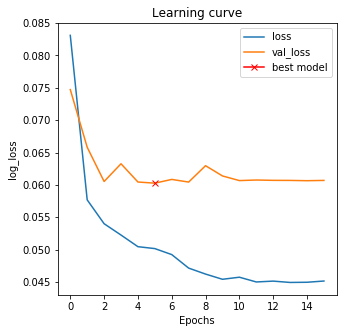

In [10]:
plot_model_scores(results)

Test score: 0.07148507982492447
Test accuracy: 0.9675827026367188
4/4 [==============================] - 1s 202ms/step


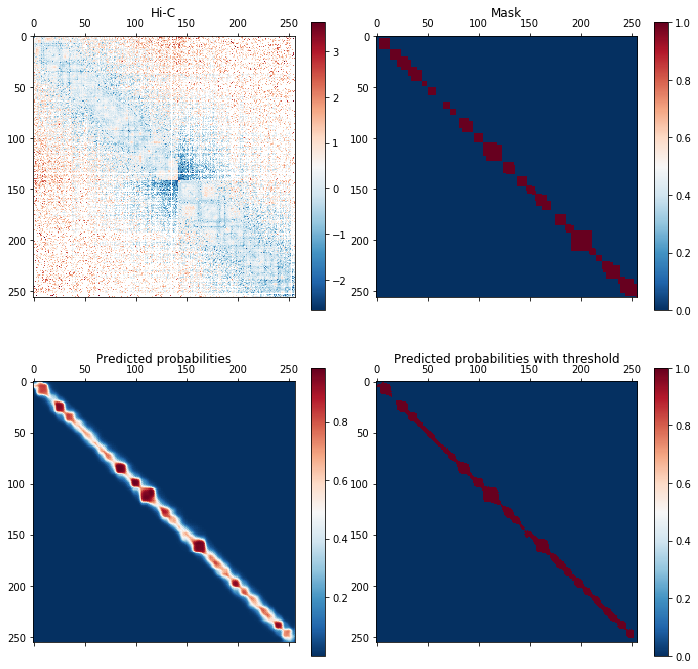

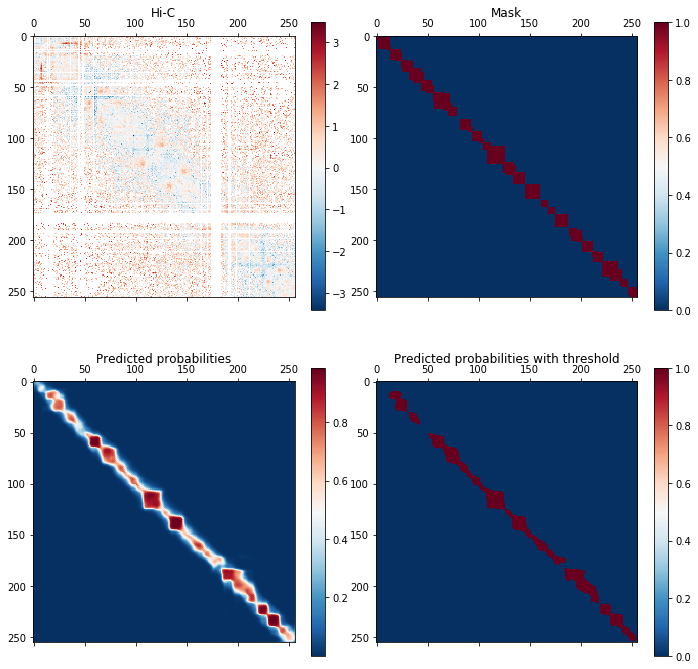

In [11]:
model.load_weights(weights_path)

score, acc = model.evaluate(X_test, y_test, verbose=0)
    
print('Test score:', score)
print('Test accuracy:', acc)

# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

loops_utils.plot_prediction_HiC(X_train[10,:,:,:],
                                y_train[10,:,:,:],
                                preds_train[10,:,:,:],
                                preds_train_t[10,:,:,:],
                                image_size=image_size)
    
loops_utils.plot_prediction_HiC(X_test[2,:,:,:],
                                y_test[2,:,:,:],
                                preds_test[2,:,:,:],
                                preds_test_t[2,:,:,:],
                                image_size=image_size)